PCA Sklearn reference link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In this workshop, we apply PCA on the following examples:
1. PCA step by step calculation on a 40 samples dataset
2. PCA on a sample 2D dataset
3. PCA on iris dataset
4. PCA on face recognization dataset
5. PCA Example - Mathematical calculation

### PCA Example - Step by Step Calculation
refer to https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [69]:
# Generate 40 3-D samples randomly drawn from a multivariate Gaussian distribution
# Assume that the samples stem from two different classes.

import numpy as np
np.random.seed(1234)
# class 1
mu_vec1 = np.array([0,0,0])
cov_mat1= np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
# class 2
mu_vec2 = np.array([1,1,1])
cov_mat2= np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T


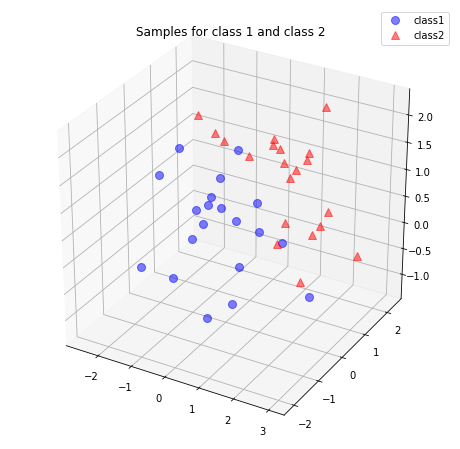

In [70]:
# plot the samples in 3D scatter plot
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [71]:
# Merge the samples into one 3x40 array
all_samples = np.concatenate((class1_sample, class2_sample), axis = 1)
all_samples.shape

(3, 40)

In [72]:
# compute the mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

In [73]:
print(mean_vector)

[[0.53513993]
 [0.3204501 ]
 [0.74643724]]


In [74]:
# Subtract the mean from each data point
all_samples_meaned = all_samples - mean_vector

In [75]:
all_samples_meaned

array([[-0.06370477, -0.84779183,  0.32444848, -2.77782488,  0.4181842 ,
        -0.53302157,  0.78601826, -1.19110927,  0.78301162, -2.35216716,
        -0.93298016,  0.51079833, -0.41042698,  1.85582059, -0.49899799,
        -1.43229671,  0.22027405, -1.98095001, -1.08338238, -0.57065296,
        -0.50937626,  0.25636131,  2.49546369,  1.16958069,  1.1690883 ,
         2.47270302,  1.09683952, -3.09865659,  0.62938961,  1.44977991,
         0.54470238, -0.11985814,  0.12009406, -0.04702124,  0.96845183,
         1.82834158,  1.68943443, -1.24585525,  0.2609272 , -1.35363892],
       [-1.5114258 , -1.04103884, -0.95697361,  0.82958562, -2.34170493,
         0.08500331, -1.86735566, -0.12702873, -0.78975539, -0.50355865,
         0.01698755,  0.54326719, -0.64324491, -0.24425052, -2.39542771,
        -0.45724494, -0.10518152, -1.72242339, -0.46506961,  0.2452882 ,
         0.60920502,  1.71335063, -0.46308139, -0.10588532,  1.20305786,
         0.90651244,  0.71906258,  2.00065551,  0.

In [76]:
# compute the covariance matrix
cov_mat = np.cov([all_samples_meaned[0,:],all_samples_meaned[1,:],all_samples_meaned[2,:]])
print(cov_mat)

[[ 1.77747533 -0.01148802 -0.06049908]
 [-0.01148802  1.10125532  0.15438341]
 [-0.06049908  0.15438341  0.6629143 ]]


In [77]:
# compute eigenvectors and corresponding eigenvalues
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [78]:
eig_val_cov

array([1.78134534, 0.61147592, 1.14882369])

In [79]:
eig_vec_cov

array([[ 0.99785694, -0.04649955, -0.04603605],
       [-0.03005032,  0.2993114 , -0.95368216],
       [-0.0581249 , -0.95302176, -0.29727263]])

In [80]:
# print eigen values and eigen vectors
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    print('eigenvalue {} from covariance matrix: {}'.format(i+1,eig_val_cov[i]))
    print('eigenvector {}: \n{}'.format(i+1,eigvec_cov))

eigenvalue 1 from covariance matrix: 1.7813453424245198
eigenvector 1: 
[[ 0.99785694]
 [-0.03005032]
 [-0.0581249 ]]
eigenvalue 2 from covariance matrix: 0.6114759199824907
eigenvector 2: 
[[-0.04649955]
 [ 0.2993114 ]
 [-0.95302176]]
eigenvalue 3 from covariance matrix: 1.1488236852481977
eigenvector 3: 
[[-0.04603605]
 [-0.95368216]
 [-0.29727263]]


In [81]:
# choose 2D feature subspace
# we choose 2 eigenvectors with the highest eigenvalues to constract our dxk eigenvector matrix W

eig_vec_cov

array([[ 0.99785694, -0.04649955, -0.04603605],
       [-0.03005032,  0.2993114 , -0.95368216],
       [-0.0581249 , -0.95302176, -0.29727263]])

In [82]:
# based on the calculation, we select the first and the third features
matrix_W =  eig_vec_cov[:, [0, 2]]

In [83]:
matrix_W

array([[ 0.99785694, -0.04603605],
       [-0.03005032, -0.95368216],
       [-0.0581249 , -0.29727263]])

In [84]:
# transform the samples into the new subspace
transformed = matrix_W.T.dot(all_samples)

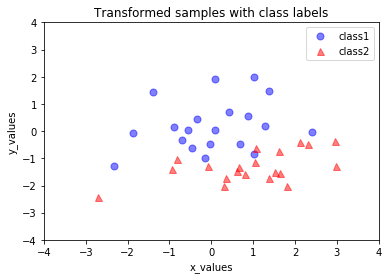

In [85]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

### PCA Example - sklearn PCA calculation

In [86]:
# use sklearn PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
transf = pca.fit_transform(all_samples.T)


In [87]:
pca.explained_variance_ratio_

array([0.50297118, 0.32437574])

In [88]:
pca.components_

array([[-0.99785694,  0.03005032,  0.0581249 ],
       [-0.04603605, -0.95368216, -0.29727263]])

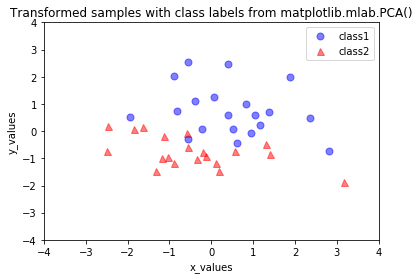

In [89]:
plt.plot(transf[0:20,0],transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf[20:40,0], transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

### Discussion
The plot above seems to be the exact mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by muptiplied by (−1) to revert the mirror image.

### PCA Example 2D->1D

In [90]:
# Consider a 2D dataset with 200 points
rng = np.random.RandomState(1)
# dot is the matrix multiplication
# .T tranpose the 2x200 matrix to 200x2 matrix
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


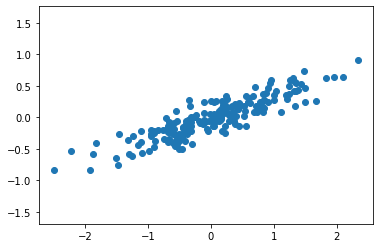

In [91]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [92]:
# there is a nearly linear relathionship between the x and y variable.
# In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, 
# and using those axes to describe the dataset. 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [93]:
print(pca.components_)

[[-0.94446029 -0.32862557]]


In [94]:
print(pca.explained_variance_)

[0.7625315]


In [95]:
X_pca = pca.transform(X)

In [96]:
X_pca

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

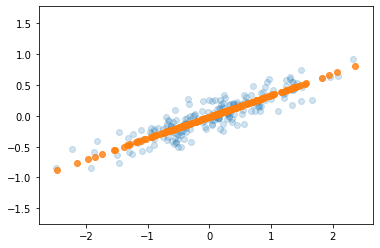

In [97]:
# inverse_transform(X): Transform data back to its original space.
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The blue points are the original data, while the orange points are the projected version

### PCA - Iris Dataset

In [98]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [99]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values


In [100]:
# standardizing the feature
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [101]:
# PCA projection to 2D
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(x)
pcDf = pd.DataFrame(data = pc, columns = ['principal component 1','principal component 2'])

In [102]:
pcDf.head

<bound method NDFrame.head of      principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]>

In [103]:
finalDf = pd.concat([pcDf, df[['target']]], axis = 1)

In [104]:
finalDf.head

<bound method NDFrame.head of      principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
..                     ...                    ...             ...
145               1.870522               0.382822  Iris-virginica
146               1.558492              -0.905314  Iris-virginica
147               1.520845               0.266795  Iris-virginica
148               1.376391               1.016362  Iris-virginica
149               0.959299              -0.022284  Iris-virginica

[150 rows x 3 columns]>

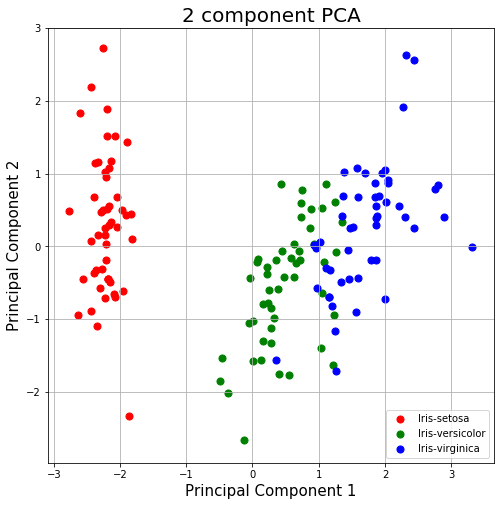

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [106]:
# Explained values
# The explained variance tells you how much information (variance) can be attributed to 
# each of the principal components.
pca.explained_variance_ratio_


array([0.72770452, 0.23030523])

In [107]:
# Together the two components contain 95.80% of the information
print(np.sum(pca.explained_variance_ratio_))

0.9580097536148199


### PCA - Face Recognition Dataset

Goal: exploring feature reduction on a Face Recognition Dataset

Face classification dataset: http://vis-www.cs.umass.edu/lfw/

Images of well-known people
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [108]:
# From anaconda: install pillow
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [109]:
n_samples, height, width = lfw.images.shape
print('number of images', n_samples)
print('height (pixels)', height)
print('width (pixels)', width)

number of images 1288
height (pixels) 50
width (pixels) 37


In [110]:
print('labels', lfw.target_names)

print('y', lfw.target.shape, lfw.target)

print('X', lfw.data.shape, lfw.data)

labels ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
y (1288,) [5 6 3 ... 5 3 5]
X (1288, 1850) [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


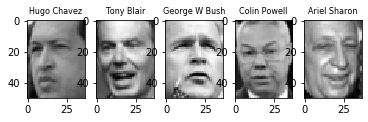

In [111]:
# plot images to see dataset

import matplotlib.pyplot as plt
num = 5

images = lfw.data[:5] # first 5 images (X)
targets = lfw.target[:5] # first 5 targets (y)

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

# for i in range(num):
#   axes[i].imshow(images[i])
#

for image, target, ax in zip(images, targets, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)
    ax.set_title(lfw.target_names[target], size=8)
    # ax.axis('off')
    
plt.show()

In [112]:
# PCA to map X to Z for training

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = lfw.data
y = lfw.target

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit using training set
pca = PCA(n_components=150)
pca.fit(X_train) # compute eigenvectors / eigenvalues

eigenfaces = pca.components_

# transform train and test


In [113]:
eigenfaces.shape

(150, 1850)

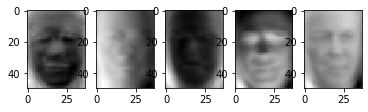

In [114]:
# plot the faces (eigenvectors)
eigenfaces = pca.components_

num = 5

# note: last 5, do eigenfaces[-num:]
images = eigenfaces[:num] # first 5 eigenvectors

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)

plt.show()

In [115]:
temp = eigenfaces[0].reshape(height, width)
temp[25:40, 10:25] # row, column

array([[-0.02487828, -0.02467447, -0.02452632, -0.02305417, -0.02087049,
        -0.02029107, -0.02008202, -0.01951726, -0.01932689, -0.01960983,
        -0.02018773, -0.02067434, -0.02173944, -0.02383469, -0.02586981],
       [-0.02583157, -0.02527118, -0.02474283, -0.02288171, -0.0213404 ,
        -0.02115587, -0.02077518, -0.01987744, -0.020436  , -0.02101298,
        -0.02133685, -0.02185675, -0.0227921 , -0.0245804 , -0.02685452],
       [-0.02662872, -0.02633291, -0.02522713, -0.02341744, -0.02306831,
        -0.02318049, -0.02206357, -0.02122839, -0.02214611, -0.02268801,
        -0.02309146, -0.02405547, -0.02497943, -0.02571434, -0.0274439 ],
       [-0.02757873, -0.02735886, -0.02589593, -0.02442686, -0.02438705,
        -0.02459553, -0.02407887, -0.0240467 , -0.02493099, -0.0255479 ,
        -0.02625504, -0.02642298, -0.02682359, -0.02629854, -0.02721147],
       [-0.02740666, -0.02697658, -0.0263904 , -0.02641596, -0.02634615,
        -0.02602525, -0.02650301, -0.02781517, 

In [116]:
print(pca.explained_variance_)

[501418.62    391794.06    183592.98    154257.12    133670.98
  74828.69     65169.89     56409.02     52337.816    49298.81
  43599.16     40965.586    31706.809    28196.893    27588.2
  25390.385    23128.97     22155.646    21659.758    18729.059
  18053.488    16946.465    16575.912    14548.053    13765.104
  13481.166    13152.372    12549.609    11496.799    10829.21
  10203.929     9893.557     9228.3       9102.343     8670.943
   8551.071     8154.396     7677.2886    7519.6733    7379.371
   7257.0815    6934.4395    6736.0483    6697.169     6244.08
   6194.1963    6101.129     5768.964     5637.307     5612.902
   5418.4697    5324.1763    5194.4717    5116.044     5023.6387
   4892.332     4669.669     4636.621     4530.9204    4485.163
   4293.185     4223.2295    4079.6904    3976.534     3886.7532
   3816.7031    3730.3691    3677.263     3620.6353    3580.4612
   3473.1218    3451.4143    3338.523     3255.1304    3220.2026
   3158.421     3134.662     3066.2378    

In [117]:
print(pca.explained_variance_ratio_)

[0.19346534 0.15116824 0.07083678 0.05951795 0.05157507 0.0288716
 0.02514489 0.02176463 0.02019381 0.01902125 0.01682212 0.015806
 0.01223363 0.01087938 0.01064452 0.00979652 0.00892399 0.00854845
 0.00835711 0.00722634 0.00696569 0.00653856 0.00639558 0.00561316
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.0041783
 0.00393704 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178898 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134006 0.00133168
 0.00128812 0.00125595 0.00124247 0.00121863 0.00120947 0.00118306
 0.00115092 0.00113678 0.00112625 0.0011162  0.00109398 0.00107179
 0.0010567  0.00104364 0.00102393 0.00101693 0.00099774 0.00096373

In [118]:
# eigenvalues-equivalent (explained_variance)
# print(pca.explained_variance_)

import numpy as np
# 95.7% of the variance is captured by projecting from 1850 to 150 features 
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.956722
[0.19346534 0.15116824 0.07083678 0.05951795 0.05157507 0.0288716
 0.02514489 0.02176463 0.02019381 0.01902125 0.01682212 0.015806
 0.01223363 0.01087938 0.01064452 0.00979652 0.00892399 0.00854845
 0.00835711 0.00722634 0.00696569 0.00653856 0.00639558 0.00561316
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.0041783
 0.00393704 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178898 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134006 0.00133168
 0.00128812 0.00125595 0.00124247 0.00121863 0.00120947 0.00118306
 0.00115092 0.00113678 0.00112625 0.0011162  0.00109398 0.00107179
 0.0010567  0.00104364 0.00102393 0.00101693 0.00099774 0

50 : 0.8630173
100 : 0.9283416
150 : 0.9567278
200 : 0.9721925
250 : 0.9815154


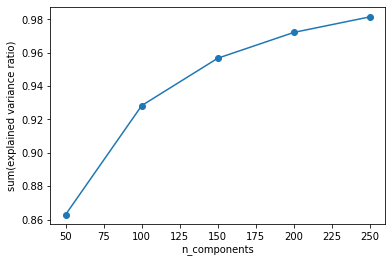

In [119]:
components = range(50, 300, 50)
evrs = []

for n in components:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train) # notice that PCA is unsupervised

    # compute sum of ratios (e.g. 0.95, etc)
    evr = np.sum(pca_temp.explained_variance_ratio_)
    evrs.append(evr)
    print(n, ':', evr)
    
fig, ax = plt.subplots()
ax.plot(components, evrs, marker='o')
ax.set(xlabel='n_components', ylabel='sum(explained variance ratio)')
plt.show()

In [120]:
# plot the transformed "images"
Z_train = pca.transform(X_train) # Z_train = e . X_train'
Z_test = pca.transform(X_test)

print('Train set after PCA', Z_train.shape)
print('Test set after PCA', Z_test.shape)

Train set after PCA (966, 150)
Test set after PCA (322, 150)


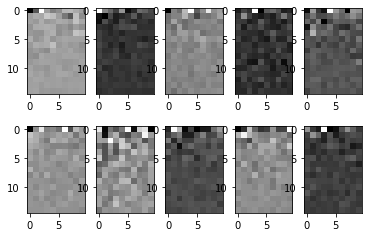

In [121]:
nrows=2
ncols=5

num = nrows * ncols
z_height = 15 # arbitrary (just for plotting)
z_width = 10

images = Z_train[:num] # first 5 transformed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(z_height, z_width), cmap=plt.cm.gray) 
plt.show()

Have a nice day!